# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [33]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df =  pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [37]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [38]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values** #

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [39]:
df.drop(['Informed_On', 'Breakdown_or_Running_Late', 'Have_You_Alerted_OPT'], axis=1, inplace=True)

Text(0.5, 1.0, 'Distribution of Missing Data by Variable ')

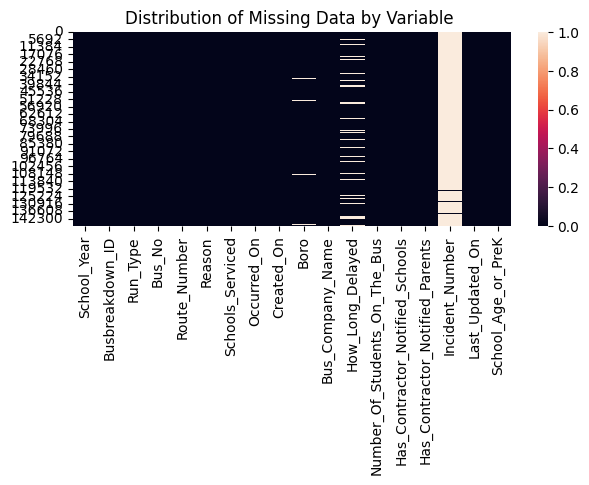

In [40]:
sns.heatmap(df.isnull()) #See distribution of missing data
plt.figsize = (5,2.5)
plt.tight_layout()
plt.title('Distribution of Missing Data by Variable ')

In [41]:
df = df.drop(['Incident_Number'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [42]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120553 entries, 0 to 147971
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      120553 non-null  object
 1   Busbreakdown_ID                  120553 non-null  int64 
 2   Run_Type                         120553 non-null  object
 3   Bus_No                           120553 non-null  object
 4   Route_Number                     120553 non-null  object
 5   Reason                           120553 non-null  object
 6   Schools_Serviced                 120553 non-null  object
 7   Occurred_On                      120553 non-null  object
 8   Created_On                       120553 non-null  object
 9   Boro                             120553 non-null  object
 10  Bus_Company_Name                 120553 non-null  object
 11  How_Long_Delayed                 120553 non-null  object
 12  Number_Of_Students_On

In [43]:
df_clean.head(100)


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Last_Updated_On,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,10/26/2015 08:40:39 AM,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,10/27/2015 07:11:22 AM,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,09/18/2015 07:38:44 AM,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,09/17/2015 08:12:08 AM,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,09/18/2015 07:56:40 AM,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2015-2016,1213564,Pre-K/EI,8015,1204ZZ,Delayed by School,C997,09/09/2015 04:11:00 PM,09/09/2015 04:28:00 PM,Brooklyn,L & M BUS CORP.,20 mins,5,Yes,Yes,09/09/2015 04:28:47 PM,Pre-K
120,2015-2016,1215772,Special Ed AM Run,16428,X310,Heavy Traffic,10095,09/18/2015 07:20:00 AM,09/18/2015 07:31:00 AM,Bronx,CONSOLIDATED BUS TRANS. I,20mins,3,Yes,Yes,09/18/2015 07:31:29 AM,School-Age
121,2015-2016,1225299,General Ed Field Trip,025,R9221,Late return from Field Trip,31060,10/27/2015 01:45:00 PM,10/27/2015 01:55:00 PM,Staten Island,PIONEER TRANSPORTATION CO,20 min,0,Yes,No,10/27/2015 01:55:59 PM,School-Age
122,2015-2016,1226023,General Ed AM Run,349,X2299,Other,12124,10/29/2015 07:45:00 AM,10/29/2015 07:50:00 AM,Bronx,"GRANDPA`S BUS CO., INC.",20 mins,18,Yes,Yes,10/29/2015 08:00:16 AM,School-Age


In [44]:
df_clean['Delay'] = df_clean['How_Long_Delayed'].str.extract('(\d+)')
df_clean.head()

<ipython-input-44-ad81fcbfa2f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Delay'] = df_clean['How_Long_Delayed'].str.extract('(\d+)')


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Last_Updated_On,School_Age_or_PreK,Delay
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,10/26/2015 08:40:39 AM,Pre-K,10
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,10/27/2015 07:11:22 AM,Pre-K,25
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,09/18/2015 07:38:44 AM,Pre-K,15
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,09/17/2015 08:12:08 AM,Pre-K,10
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,09/18/2015 07:56:40 AM,Pre-K,10


In [45]:
df_clean[df_clean['Delay'].isnull()]

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Last_Updated_On,School_Age_or_PreK,Delay
303,2015-2016,1224869,Special Ed AM Run,80,Q419,Heavy Traffic,24075,10/26/2015 08:02:00 AM,10/26/2015 08:06:00 AM,Queens,SAFE COACH INC. (B2321),half hour,12,No,No,10/26/2015 08:06:27 AM,School-Age,NaN
391,2015-2016,1226232,Special Ed PM Run,2368,K071,Accident,20470,10/29/2015 03:00:00 PM,10/29/2015 03:30:00 PM,Brooklyn,JOFAZ TRANSPORTATION INC.,?????,8,Yes,Yes,10/29/2015 04:25:00 PM,School-Age,NaN
672,2015-2016,1216006,General Ed PM Run,2306,K9827,Delayed by School,"13287,18759",09/18/2015 02:25:00 PM,09/18/2015 02:31:00 PM,Brooklyn,JOFAZ TRANSPORTATION INC.,?????????,0,Yes,Yes,09/18/2015 02:31:18 PM,School-Age,NaN
979,2015-2016,1226421,Special Ed AM Run,16,Q313,Heavy Traffic,30901,10/30/2015 07:43:00 AM,10/30/2015 07:43:00 AM,Queens,SAFE COACH INC. (B2321),half hour,3,No,No,10/30/2015 07:43:53 AM,School-Age,NaN
1501,2015-2016,1224549,General Ed AM Run,1680,K1819,Heavy Traffic,"18486,18694",10/26/2015 06:15:00 AM,10/26/2015 06:20:00 AM,Brooklyn,JOFAZ TRANSPORTATION INC.,??????,0,Yes,Yes,10/26/2015 06:20:32 AM,School-Age,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145408,2016-2017,1313267,Special Ed AM Run,1334,K675,Mechanical Problem,13463,01/09/2017 06:32:00 AM,01/09/2017 06:39:00 AM,Brooklyn,Y & M TRANSIT CORP (B2192,????????,0,Yes,Yes,01/09/2017 06:39:35 AM,School-Age,NaN
145626,2016-2017,1324797,General Ed AM Run,1629,K9809,Late return from Field Trip,18706,02/16/2017 12:15:00 PM,02/16/2017 12:30:00 PM,Brooklyn,JOFAZ TRANSPORTATION INC.,????,0,Yes,Yes,02/16/2017 12:30:24 PM,School-Age,NaN
145644,2016-2017,1319006,Special Ed AM Run,803,K674,Heavy Traffic,"13463,13669,",01/27/2017 06:40:00 AM,01/27/2017 06:53:00 AM,Brooklyn,Y & M TRANSIT CORP (B2192,??????,0,Yes,Yes,01/27/2017 06:53:02 AM,School-Age,NaN
146711,2016-2017,1347020,General Ed AM Run,1630,K1819,Accident,"18486,18694",05/10/2017 06:25:00 AM,05/10/2017 06:39:00 AM,Brooklyn,JOFAZ TRANSPORTATION INC.,???????,0,Yes,Yes,05/10/2017 07:12:40 AM,School-Age,NaN


In [46]:
df_clean = df_clean.dropna()
df_clean.isnull().sum()
df_clean['Delay'] =  pd.to_numeric(df_clean['Delay'])
df_clean = df_clean.drop(['How_Long_Delayed'], axis = 1)


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

<ipython-input-47-cdc7b8475279>:1: FutureWarning: The provided callable <function mean at 0x7d315e71fd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  reasons = pd.pivot_table(df_clean, index = 'Reason', values = 'Delay', aggfunc = [np.mean, np.max,np.size]).sort_values(by =
<ipython-input-47-cdc7b8475279>:1: FutureWarning: The provided callable <function max at 0x7d315e71f490> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  reasons = pd.pivot_table(df_clean, index = 'Reason', values = 'Delay', aggfunc = [np.mean, np.max,np.size]).sort_values(by =


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Late return from Field Trip'),
  Text(1, 0, 'Mechanical Problem'),
  Text(2, 0, 'Won`t Start'),
  Text(3, 0, 'Accident'),
  Text(4, 0, 'Flat Tire'),
  Text(5, 0, 'Weather Conditions'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Heavy Traffic'),
  Text(8, 0, 'Problem Run'),
  Text(9, 0, 'Delayed by School')])

<Figure size 500x5000 with 0 Axes>

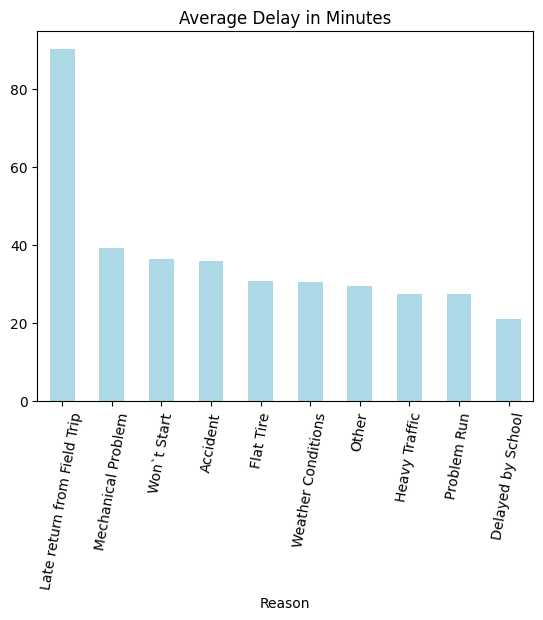

<Figure size 500x5000 with 0 Axes>

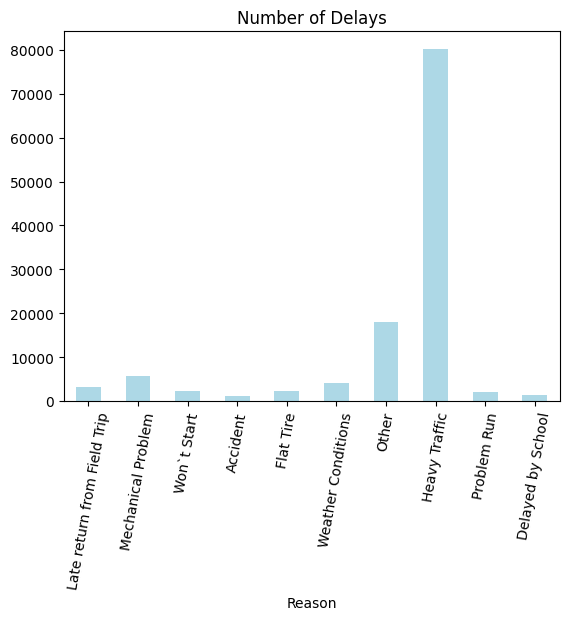

In [47]:
reasons = pd.pivot_table(df_clean, index = 'Reason', values = 'Delay', aggfunc = [np.mean, np.max,np.size]).sort_values(by =
                                                                                                    ('mean', 'Delay'),
                                                                                        ascending = False)
plt.figure(figsize = (5,50))
reasons.plot(kind = 'bar', y = ('mean','Delay'), color = 'lightblue')
plt.title('Average Delay in Minutes')
plt.legend().remove()
plt.xticks(rotation = 80)

#See size distribution by reason
plt.figure(figsize = (5,50))
reasons.plot(kind = 'bar', y = ('size','Delay'), color = 'lightblue')
plt.title('Number of Delays')
plt.legend().remove()
plt.xticks(rotation = 80)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [48]:
from sklearn.model_selection import train_test_split

y = df_clean['Delay'] #store target variable
df_model = df_clean.drop(['Delay'], axis = 1)
X = df_model[['Run_Type','Reason','Boro','Number_Of_Students_On_The_Bus','Breakdown_or_Running_Late',
             'School_Age_or_PreK']]

KeyError: "['Breakdown_or_Running_Late'] not in index"

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
model = Sequential([
    # Input layer is implicit in the first Dense layer
    Dense(64, activation='relu', input_shape=(10,)),  # 10 features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(X_train, y_train,epochs=20,batch_size=32,validation_data=(X_val, y_val))

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
predictions = model.predict()

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('my_ANN.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: evrey Q num ==> num of ANS
1- ans ; preprocessing technique plays a specific role in transforming raw data into a format that improves model training efficiency and effectiveness. The choice of technique depends on the nature of the data and the type of model being used
2- ans ;
By tailoring the model architecture to the specific problem and data, you can build a network that learns effectively and performs well on your given task.
3- ans ; choices and experiments were crucial in fine-tuning the models performance. Each adjustment aimed at making the training process more efficient and ensuring that the model generalizes well to new data.

6- ans; it’s like having a set of tools to measure different aspects of the model’s performance, ensuring it’s both accurate and reliable.


8- ans ; addressing overfitting and underfitting involves balancing model complexity with training practices to ensure it generalizes well to unseen data while effectively capturing underlying patterns.